In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# Add parent directory to sys.path for module import
path = os.path.abspath('../')
if path not in sys.path:
    sys.path.append(path)
print(f"Module path: {path}")

Module path: c:\Users\Administrator\DataScience


In [2]:
%load_ext autoreload
%autoreload 2
from src.data import DataPreprocessor

In [3]:
dp = DataPreprocessor()

In [4]:
data = dp.load_data('../data/Diabetes Missing Data.csv')  # Replace with your file path
display(data.head())  # Display first 5 rows in Jupyter




Loaded dataset: (768, 9)


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:

# ------------------  Check data info ------------------
dp.check_data_info(data)


--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None

SUMMARY STATISTICS
          Pregnant     Glucose  Diastolic_BP   Skin_Fold  Serum_Insulin  \
count  768.000000  763.000000    733.000000  541.000000     394.000000   
mean     3.845052  121.686763     72.405184   29.153420     155.548223   
std      3.369578   30.535641     12.382158   10.4


📊 Missing Values Before Handling


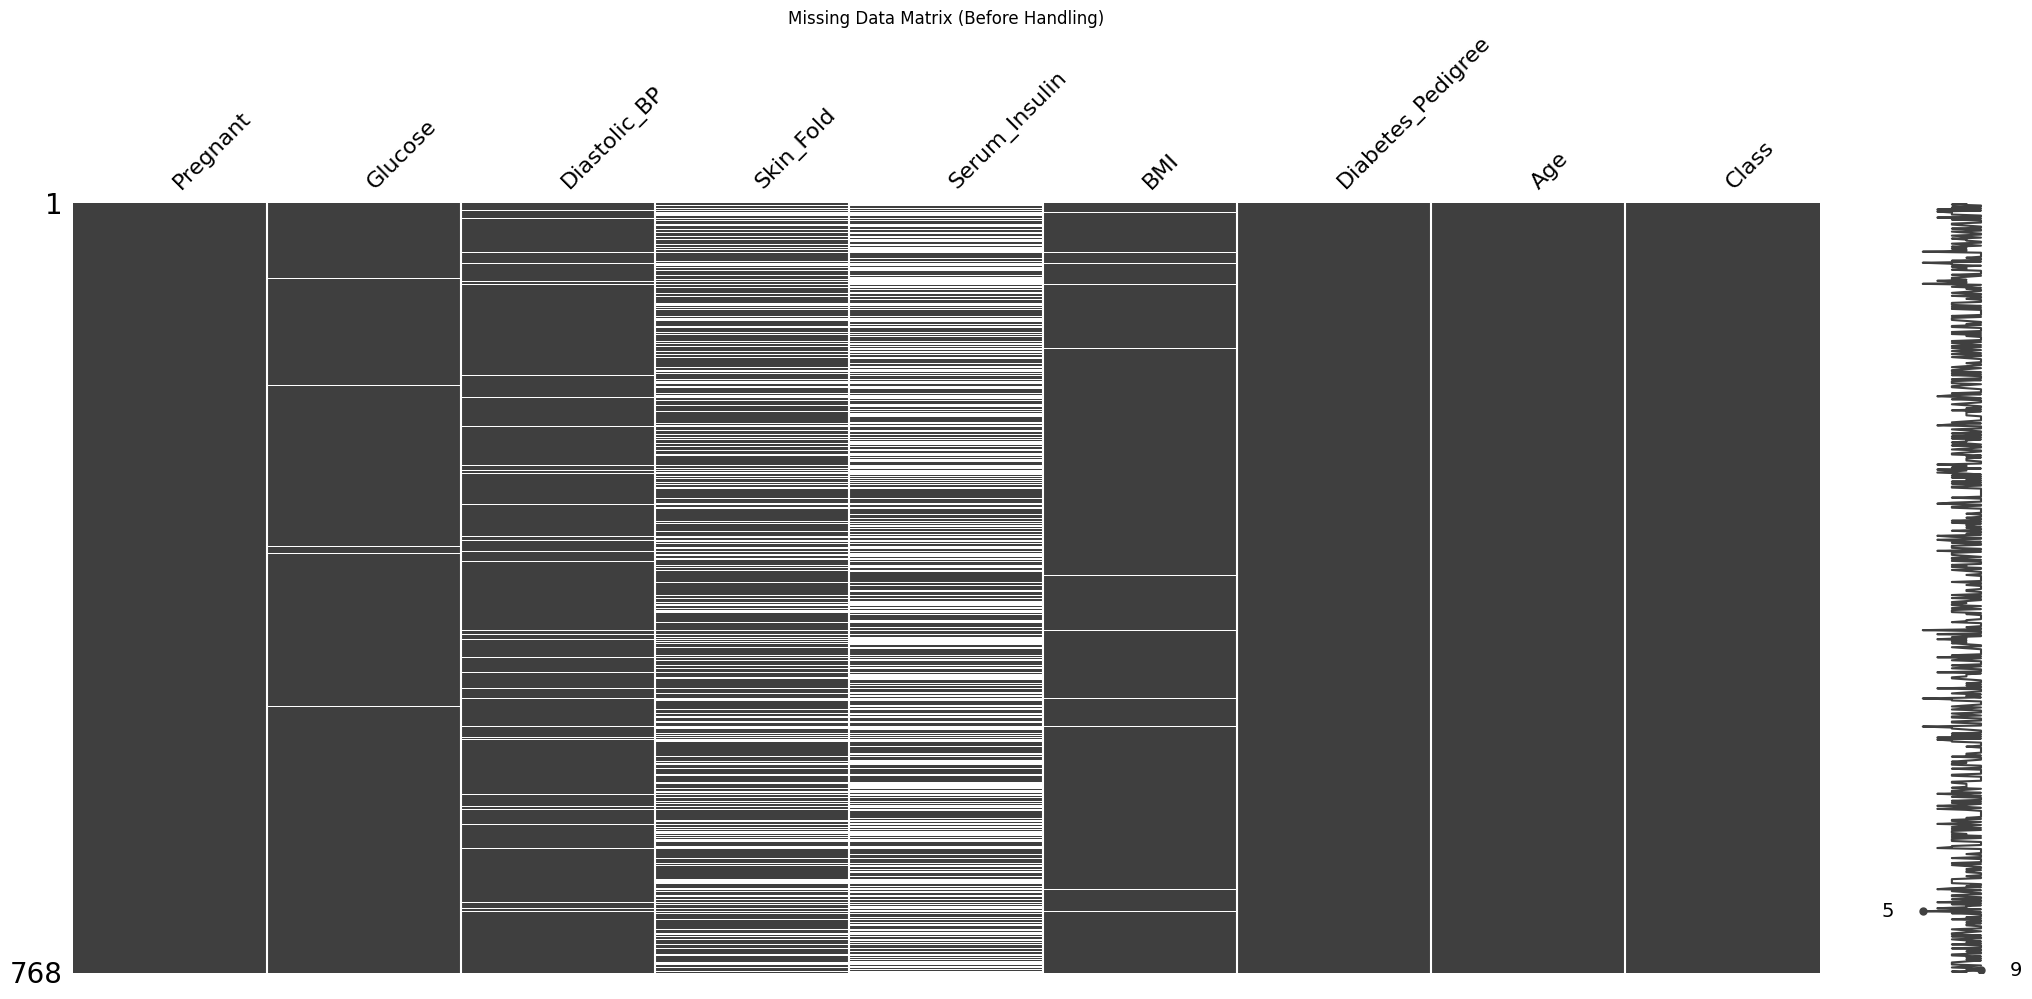

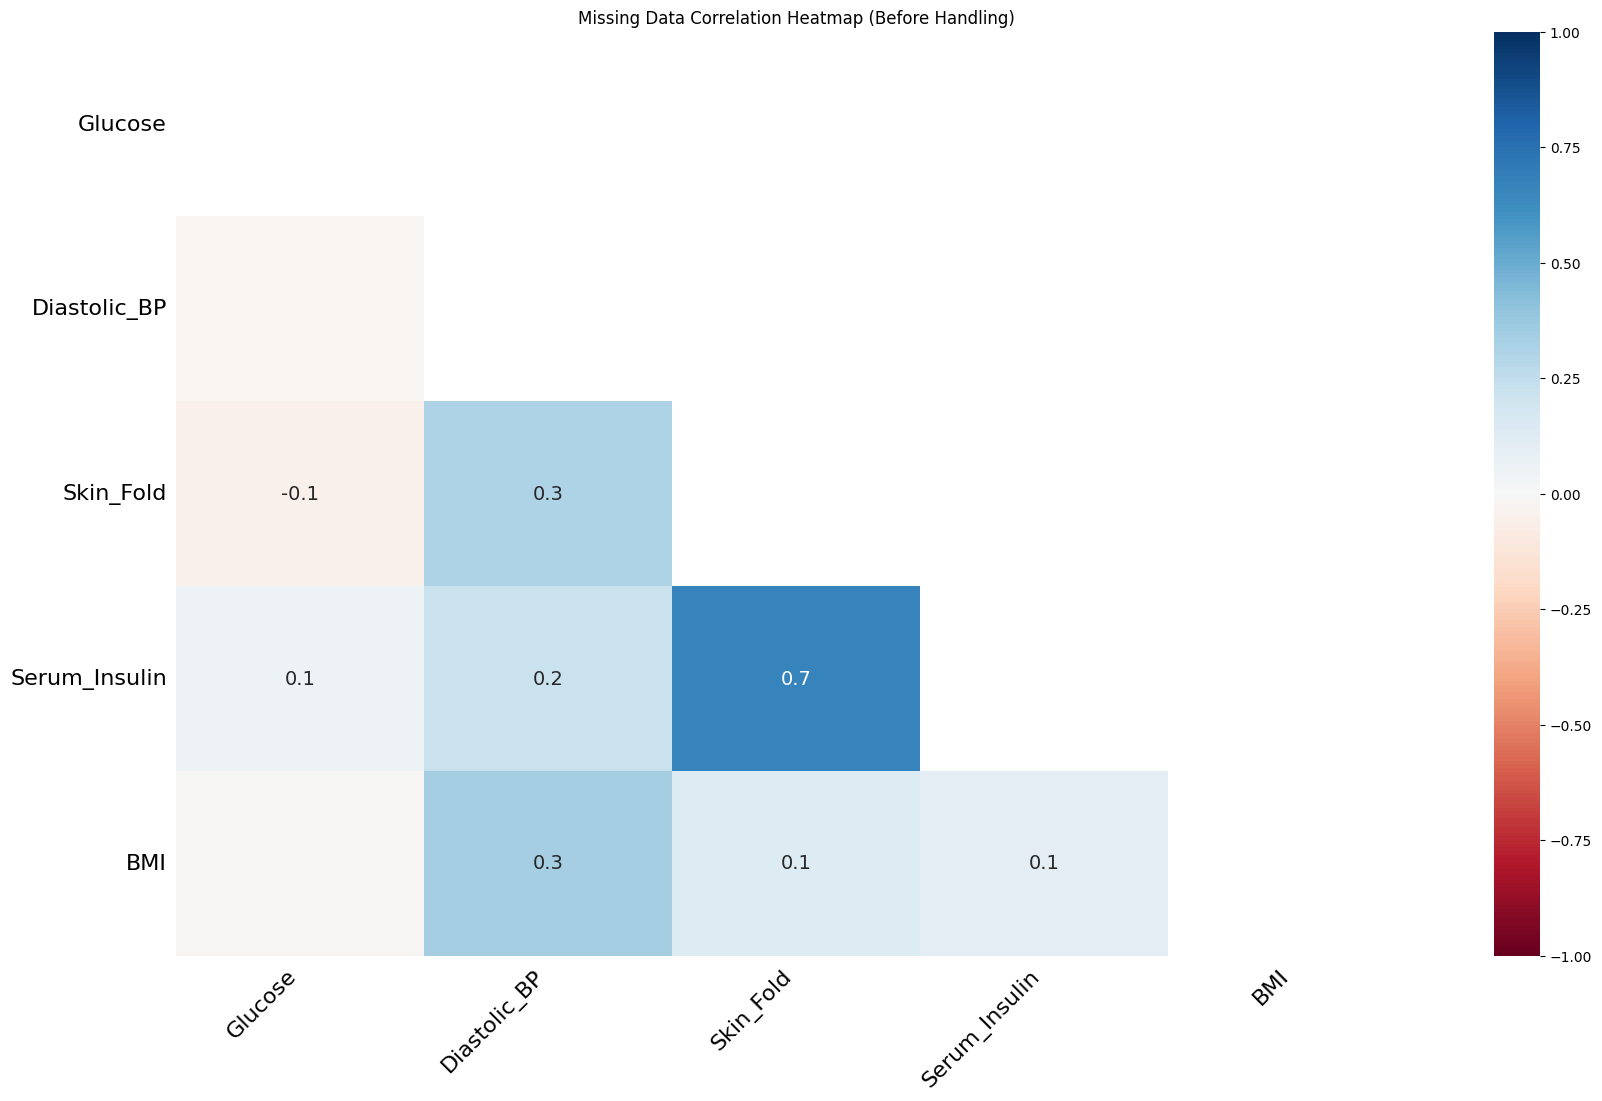

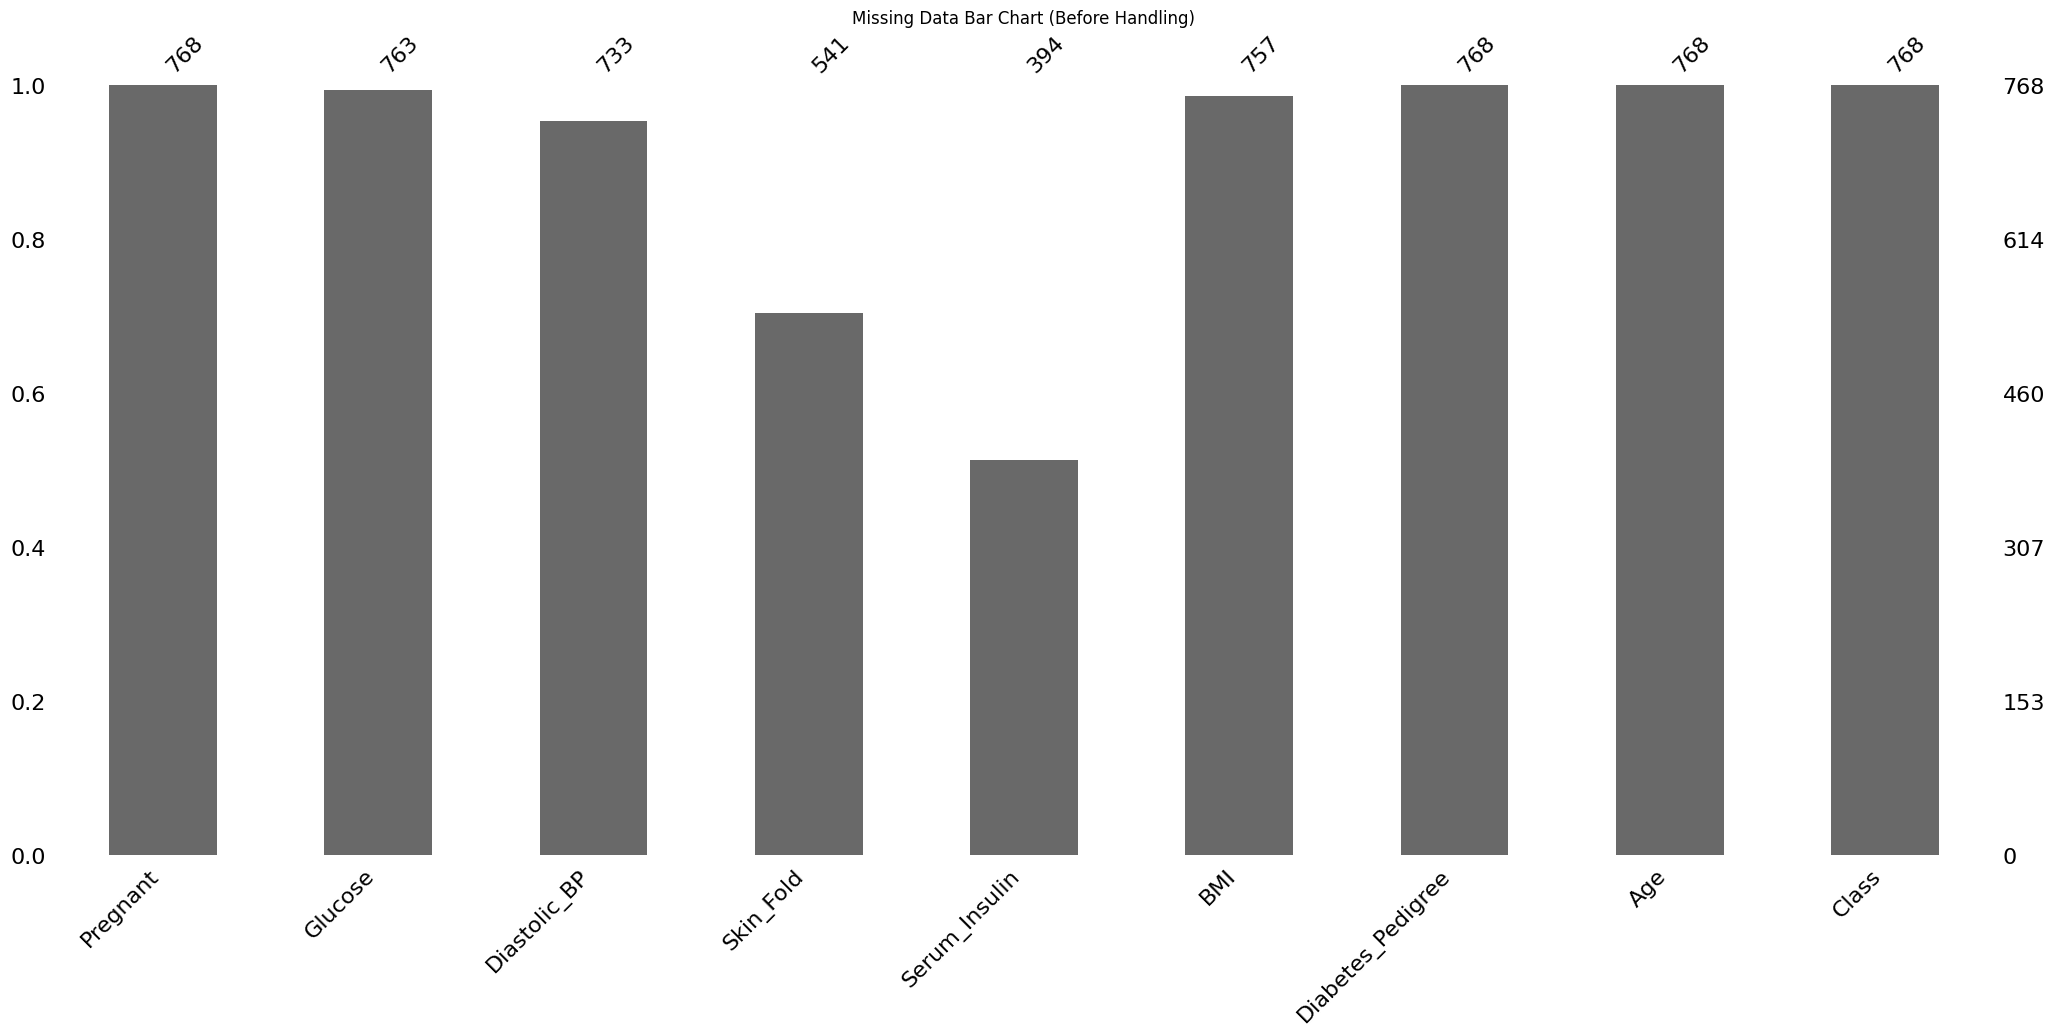

In [6]:
print("\n📊 Missing Values Before Handling")
msno.matrix(data)
plt.title("Missing Data Matrix (Before Handling)")
plt.show()
msno.heatmap(data)
plt.title("Missing Data Correlation Heatmap (Before Handling)")
plt.show()
msno.bar(data)
plt.title("Missing Data Bar Chart (Before Handling)")
plt.show()

In [7]:
# ------------------ 3 Handle missing values ------------------
data = dp. handle_missing_values(data)
display(data.head())



MISSING VALUE % PER COLUMN:
 Pregnant              0.00
Glucose               0.65
Diastolic_BP          4.56
Skin_Fold            29.56
Serum_Insulin        48.70
BMI                   1.43
Diabetes_Pedigree     0.00
Age                   0.00
Class                 0.00
dtype: float64
'Glucose': filled with MEAN (0.7%)
'Diastolic_BP': filled with MEAN (4.6%)
'Skin_Fold': filled with MEDIAN (29.6%)
'Serum_Insulin': dropped (48.7%)
'BMI': filled with MEAN (1.4%)


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


In [8]:
# ------------------ 4️ Remove duplicates ------------------
data = dp.remove_duplicates(data)
display(data.head())

No duplicates found


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


In [9]:
# ------------------5️ Detect and cap outliers ------------------
data = dp.detect_and_cap_outliers(data)
display(data.head())

Capped 4 outliers in 'Pregnant'
Capped 14 outliers in 'Diastolic_BP'
Capped 87 outliers in 'Skin_Fold'
Capped 8 outliers in 'BMI'
Capped 29 outliers in 'Diabetes_Pedigree'
Capped 9 outliers in 'Age'


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,43.1,1.200,33.0,1


In [10]:
# ------------------6️ Feature engineering ------------------
data = dp.feature_engineering(data)
display(data.head())

Added derived columns: BMI_Category, Age_Group, Glucose_Level


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class,BMI_Category,Age_Group,Glucose_Level
0,6.0,148.0,72.0,35.0,33.6,0.627,50.0,1,Obese,Middle-Aged,Diabetes
1,1.0,85.0,66.0,29.0,26.6,0.351,31.0,0,Overweight,Middle-Aged,Normal
2,8.0,183.0,64.0,29.0,23.3,0.672,32.0,1,Normal,Middle-Aged,Diabetes
3,1.0,89.0,66.0,23.0,28.1,0.167,21.0,0,Overweight,Young,Normal
4,0.0,137.0,40.0,35.0,43.1,1.200,33.0,1,Obese,Middle-Aged,Diabetes


In [11]:
# ------------------ 7️ Encode categorical variables ------------------
data = dp.encode_categorical(data)
display(data.head())

Encoded categorical variables (label + one-hot)


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class,BMI_Category,BMI_Category_Encoded,Age_Group_Middle-Aged,Age_Group_Senior,Glucose_Level_Prediabetes,Glucose_Level_Diabetes
0,6.0,148.0,72.0,35.0,33.6,0.627,50.0,1,Obese,3,True,False,False,True
1,1.0,85.0,66.0,29.0,26.6,0.351,31.0,0,Overweight,2,True,False,False,False
2,8.0,183.0,64.0,29.0,23.3,0.672,32.0,1,Normal,1,True,False,False,True
3,1.0,89.0,66.0,23.0,28.1,0.167,21.0,0,Overweight,2,False,False,False,False
4,0.0,137.0,40.0,35.0,43.1,1.200,33.0,1,Obese,3,True,False,False,True


In [12]:
# ------------------ 8️ Scale features ------------------
data = dp.scale_features(data)
display(data.head())

Scaled 7 numeric features with MinMaxScaler


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class,BMI_Category,BMI_Category_Encoded,Age_Group_Middle-Aged,Age_Group_Senior,Glucose_Level_Prediabetes,Glucose_Level_Diabetes
0,0.444444,0.670968,0.50000,0.732143,0.480499,0.489305,0.637363,1,Obese,3,True,False,False,True
1,0.074074,0.264516,0.40625,0.517857,0.262090,0.243316,0.219780,0,Overweight,2,True,False,False,False
2,0.592593,0.896774,0.37500,0.517857,0.159126,0.529412,0.241758,1,Normal,1,True,False,False,True
3,0.074074,0.290323,0.40625,0.303571,0.308892,0.079323,0.000000,0,Overweight,2,False,False,False,False
4,0.000000,0.600000,0.00000,0.732143,0.776911,1.000000,0.263736,1,Obese,3,True,False,False,True


In [13]:
# ------------------ 9️ Feature selection ------------------
data = dp.select_features(data, k=8)
display(data.head())

Selected top 8 features: ['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'BMI', 'Diabetes_Pedigree', 'Age', 'BMI_Category_Encoded']


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,BMI_Category_Encoded,Class
0,0.444444,0.670968,0.50000,0.732143,0.480499,0.489305,0.637363,3.0,1
1,0.074074,0.264516,0.40625,0.517857,0.262090,0.243316,0.219780,2.0,0
2,0.592593,0.896774,0.37500,0.517857,0.159126,0.529412,0.241758,1.0,1
3,0.074074,0.290323,0.40625,0.303571,0.308892,0.079323,0.000000,2.0,0
4,0.000000,0.600000,0.00000,0.732143,0.776911,1.000000,0.263736,3.0,1


In [14]:
# ------------------ 1️0 Apply PCA ------------------
data = dp.apply_pca(data, n=6)
display(data.head())

PCA: 6 components explain 96.2% variance


,PC1,PC2,PC3,PC4,PC5,PC6,Class
0,0.586622,0.375967,0.130276,0.006917,0.023680,-0.076322,1
1,-0.518286,-0.189657,-0.068695,0.104316,-0.088168,0.116670,0
2,-1.428103,0.376722,0.302023,0.180557,0.067442,-0.441878,1
3,-0.558037,-0.377291,-0.246207,-0.025187,-0.038846,0.056563,0
4,0.613784,-0.275008,0.701168,0.036263,-0.109385,-0.258518,1



⚖️ Class Balance Before SMOTE


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1676\2892322821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Class', palette='viridis')


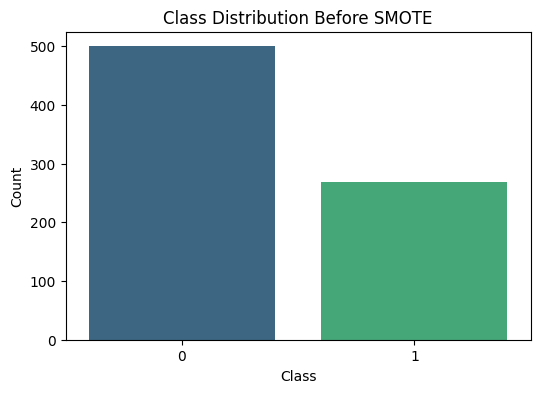

Before SMOTE: {0: np.int64(500), 1: np.int64(268)}
After SMOTE: {1: np.int64(500), 0: np.int64(500)}


,PC1,PC2,PC3,PC4,PC5,PC6,Class
0,0.586622,0.375967,0.130276,0.006917,0.023680,-0.076322,1
1,-0.518286,-0.189657,-0.068695,0.104316,-0.088168,0.116670,0
2,-1.428103,0.376722,0.302023,0.180557,0.067442,-0.441878,1
3,-0.558037,-0.377291,-0.246207,-0.025187,-0.038846,0.056563,0
4,0.613784,-0.275008,0.701168,0.036263,-0.109385,-0.258518,1


In [15]:
# ------------------ 1️1 Handle class imbalance ------------------

print("\n⚖️ Class Balance Before SMOTE")
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Class', palette='viridis')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
data = dp.handle_imbalance(data)
display(data.head())

In [16]:
# ------------------  Final dataset ------------------
print(f"Final shape: {data.shape}")

Final shape: (1000, 7)


In [17]:
output_dir = "../data/cleaned"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "Cleaned_Diabetes.csv")
data.to_csv(output_path, index=False)
print(f"✅ Cleaned data saved to: {output_path}")
print(f"Final shape: {data.shape}")

✅ Cleaned data saved to: ../data/cleaned\Cleaned_Diabetes.csv
Final shape: (1000, 7)


In [44]:
summary = dp.export_data_summary(data, output_path='../reports/data_summary.json')

# Check output preview
import json
with open('../reports/data_summary.json', 'r') as f:
    print(json.dumps(json.load(f), indent=4)[:1000])

✅ Data summary exported successfully → ../reports/data_summary.json
{
    "dataset_info": {
        "shape": [
            1000,
            7
        ],
        "columns": [
            "PC1",
            "PC2",
            "PC3",
            "PC4",
            "PC5",
            "PC6",
            "Class"
        ],
        "dtypes": {
            "PC1": "float64",
            "PC2": "float64",
            "PC3": "float64",
            "PC4": "float64",
            "PC5": "float64",
            "PC6": "float64",
            "Class": "int64"
        },
        "memory_usage": 0.053531646728515625
    },
    "missing_values": {
        "missing_nan": {
            "Missing Count": {
                "PC1": 0,
                "PC2": 0,
                "PC3": 0,
                "PC4": 0,
                "PC5": 0,
                "PC6": 0,
                "Class": 0
            },
            "Percentage": {
                "PC1": 0.0,
                "PC2": 0.0,
                "PC3": 0.0